Step 0. Read in Data and NLTK Basics¶


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/netflixdataset/netflix_titles_enriched.csv')
print(df.shape)
df = df.head(100)
print(df.shape)

(9558, 18)
(100, 18)


In [3]:
df.head()

,cast,type,title,country,date_added,release_year,description,director,duration,listed_in,rating,rottentomatoes_audience_score,Score,rottentomatoes_audience_#reviews,rottentomatoes_audience_review,rottentomatoes_tomatometer_score,rottentomatoes_critics_#reviews,Text
0,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Movie,7:19,Mexico,23-Dec-16,2016,After a devastating earthquake hits Mexico Cit...,Jorge Michel Grau,93 min,"Dramas, International Movies",TV-MA,50.0,50.0,10,NaN,100.0,10.0,[{'Review': 'The intentions of this film are c...
1,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Movie,21,United States,1-Jan-20,2008,A brilliant group of students become card-coun...,Robert Luketic,123 min,Dramas,PG-13,17.0,20.0,10,NaN,NaN,0.0,"[{'Review': 'Empty calories, yes, but tasty en..."
2,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",Movie,187,United States,1-Nov-19,1997,After one of his high school students attacks ...,Kevin Reynolds,119 min,Dramas,R,67.0,70.0,17500,NaN,30.0,27.0,"[{'Review': 'Quote not available.', 'Date': 'M..."
3,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",Movie,1920,India,15-Dec-17,2008,An architect and his wife move into a castle t...,Vikram Bhatt,143 min,"Horror Movies, International Movies, Thrillers",TV-MA,31.0,30.0,175,NaN,NaN,0.0,"[{'Review': 'Post-Raaz, Vikram Bhatt comes int..."
4,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",Movie,3022,United States,19-Mar-20,2019,Stranded when the Earth is suddenly destroyed ...,John Suits,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",R,57.0,60.0,175,NaN,NaN,0.0,[{'Review': 'Delivers enough tense atmospheric...


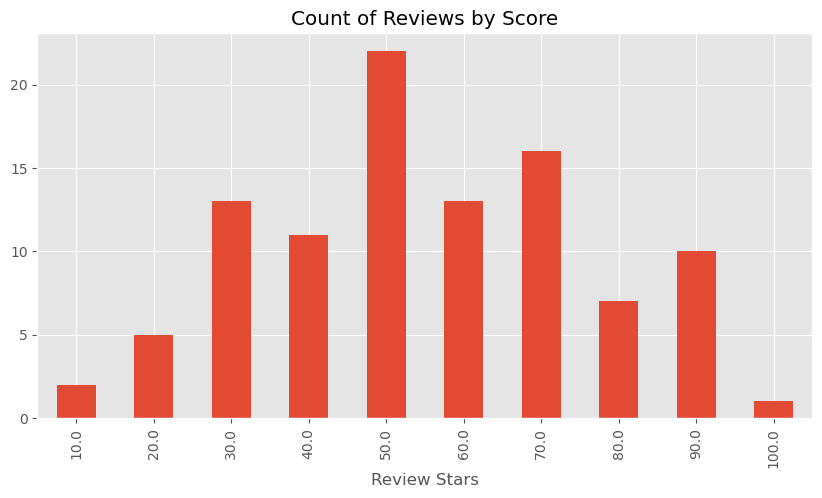

In [4]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Score',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [5]:
example = df['Text'][50]
print(example)

[{'Review': 'Families separated by border reunite for brief hugs.', 'Date': 'November 4, 2019', 'Rating': 'Rating: 3/5', 'Critic': 'Barbara Shulgasser', 'Network': 'Common Sense Media'}, {'Review': 'Heartbreaking, but full of hope. A compassionate and respectful view about the borders that separate us, and the bridges that can bring us closer together.', 'Date': 'November 2, 2019', 'Rating': 'Rating: 3/4', 'Critic': 'Rene Sanchez', 'Network': 'Cine Sin Fronteras'}, {'Review': 'A 3 Minute Hug is a good documentation of an event that more people around the U.S. should know about. But more context would have made the visuals more impactful.', 'Date': 'October 29, 2019', 'Critic': 'Joel Keller', 'Network': 'Decider'}]


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['[',
 '{',
 "'Review",
 "'",
 ':',
 "'Families",
 'separated',
 'by',
 'border',
 'reunite']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('[', 'RB'),
 ('{', '('),
 ("'Review", 'NN'),
 ("'", "''"),
 (':', ':'),
 ("'Families", 'NNS'),
 ('separated', 'VBN'),
 ('by', 'IN'),
 ('border', 'NN'),
 ('reunite', 'NN')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  [/RB
  {/(
  'Review/NN
  '/''
  :/:
  'Families/NNS
  separated/VBN
  by/IN
  border/NN
  reunite/NN
  for/IN
  brief/NN
  hugs/NNS
  ./.
  '/''
  ,/,
  'Date/NNP
  '/POS
  :/:
  'November/POS
  4/CD
  ,/,
  2019/CD
  '/''
  ,/,
  'Rating/VBG
  '/''
  :/:
  'Rating/NN
  :/:
  3/5/CD
  '/''
  ,/,
  'Critic/JJ
  '/POS
  :/:
  'Barbara/CD
  (PERSON Shulgasser/NNP)
  '/POS
  ,/,
  'Network/''
  '/POS
  :/:
  'Common/CD
  Sense/NNP
  Media/NNP
  '/POS
  }/)
  ,/,
  {/(
  'Review/POS
  '/POS
  :/:
  'Heartbreaking/NN
  ,/,
  but/CC
  full/JJ
  of/IN
  hope/NN
  ./.
  A/DT
  compassionate/NN
  and/CC
  respectful/JJ
  view/NN
  about/IN
  the/DT
  borders/NNS
  that/WDT
  separate/VBP
  us/PRP
  ,/,
  and/CC
  the/DT
  bridges/NNS
  that/WDT
  can/MD
  bring/VB
  us/PRP
  closer/JJR
  together/RB
  ./.
  '/''
  ,/,
  'Date/NNP
  '/POS
  :/:
  'November/POS
  2/CD
  ,/,
  2019/CD
  '/''
  ,/,
  'Rating/VBG
  '/''
  :/:
  'Rating/NN
  :/:
  3/4/CD
  '/''
  ,/,
  'Critic/JJ
  '/POS
  :/:
 

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [10]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [11]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Score']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Score'})
vaders = vaders.merge(df, how='left')

In [13]:
# Now we have sentiment score and metadata
vaders.head()


,Score,neg,neu,pos,compound,cast,type,title,country,date_added,...,director,duration,listed_in,rating,rottentomatoes_audience_score,rottentomatoes_audience_#reviews,rottentomatoes_audience_review,rottentomatoes_tomatometer_score,rottentomatoes_critics_#reviews,Text
0,50.0,0.063,0.846,0.091,0.9364,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Movie,7:19,Mexico,23-Dec-16,...,Jorge Michel Grau,93 min,"Dramas, International Movies",TV-MA,50.0,10,NaN,100.0,10.0,[{'Review': 'The intentions of this film are c...
1,50.0,0.063,0.846,0.091,0.9364,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Movie,#realityhigh,United States,8-Sep-17,...,Fernando Lebrija,99 min,Comedies,TV-14,51.0,175,NaN,40.0,5.0,"[{'Review': ""It's as boring as Saturday school..."
2,50.0,0.063,0.846,0.091,0.9364,"Sam Upton, Jared Abrahamson, Mark Boone Junior...",Movie,12 ROUND GUN,United States,14-Mar-19,...,Sam Upton,90 min,"Dramas, Independent Movies, Sports Movies",TV-MA,54.0,10,NaN,NaN,0.0,"[{'Review': 'Well-made, but uninspired, the fi..."
3,50.0,0.063,0.846,0.091,0.9364,"Mark Webber, Rutina Wesley, Devon Graye, Tom B...",Movie,13 Sins,United States,13-Jan-19,...,Daniel Stamm,93 min,"Horror Movies, Thrillers",R,45.0,7500,NaN,65.0,43.0,[{'Review': 'The overall effect is enormously ...
4,50.0,0.063,0.846,0.091,0.9364,"Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...",Movie,14 Blades,"Hong Kong, China, Singapore",3-Apr-19,...,Daniel Lee,113 min,"Action & Adventure, International Movies",R,52.0,1750,NaN,69.0,13.0,"[{'Review': ""Director, co-writer and productio..."


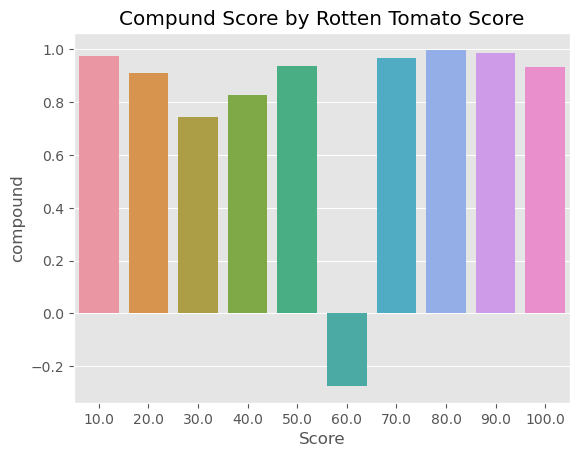

In [14]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Rotten Tomato Score')
plt.show()

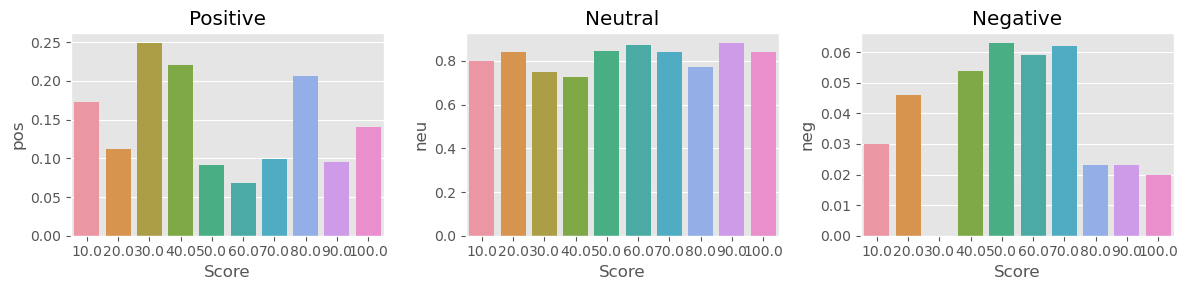

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()
